# **Naïve Bayes Classifier**

## **Attribute Information**

In [ ]:
# Listing of attributes:

# >50K, <=50K.

# age: continuous.

# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, 
# State-gov, Without-pay, Never-worked.

# fnlwgt: continuous.

# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, 
# Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

# education-num: continuous.

# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, 
# Married-spouse-absent, Married-AF-spouse.

# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, 
# Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, 
# Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

# sex: Female, Male.

# capital-gain: continuous.

# capital-loss: continuous.

# hours-per-week: continuous.

# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
#  Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, 
#  Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, 
#  Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, 
#  Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, 
#  Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

# Read CSV file from Drive into Pandas DataFrame
file_path = 'adult.data'
df = pd.read_csv(file_path)
df.columns = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income_status']

Mounted at /content/drive


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_status
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# value = df.iloc[26,1]
# result was ' ?'

In [ ]:
empty = (df == ' ?').sum()
empty

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income_status        0
dtype: int64

In [ ]:
empty.sum()

4262

In [ ]:
df = df.replace(" ?", np.nan)

In [ ]:
col_modes = df.mode().iloc[0]

In [ ]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income_status        0
dtype: int64

In [ ]:
df = df.fillna(col_modes)

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_status     0
dtype: int64

In [ ]:
target = df['income_status']
target.value_counts()

 <=50K    24719
 >50K      7841
Name: income_status, dtype: int64

**<=50K --> 0**

**>50K --> 1**

In [ ]:
def income_to_binary(income):
    if income.strip() == '>50K':
        return 1
    else:
        return 0

# apply the function to the income column using the apply method, and assign the result to a new column
df['income_status'] = df['income_status'].apply(income_to_binary)

In [ ]:
df.iloc[:,14]

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income_status, Length: 32560, dtype: int64

In [ ]:
target = df['income_status']
target.value_counts()

0    24719
1     7841
Name: income_status, dtype: int64

##Training and Test split

In [ ]:
# 67:33
# train_size = int(2/3 * len(df))
# 80:20.
# train_size = int(4/5 * len(df))
# 90:10.
# train_size = int(9/10 * len(df))
# 60:40.
# train_size = int(6/10 * len(df))
# 50:50.
# train_size = int(5/10 * len(df))
# 33:67.
# train_size = int(1/3 * len(df))
# 95:5.
# train_size = int(11/20 * len(df))
# 40:60.
# train_size = int(4/10 * len(df))
# 70:30.
# train_size = int(7/10 * len(df))
# 33:67.
train_size = int(1/3 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]

# Separate features and target variables
X_train = train_data.drop(['income_status'], axis=1)
y_train = train_data['income_status']
X_test = test_data.drop(['income_status'], axis=1)
y_test = test_data['income_status']

## **Naive Bayes Classifier Implementation**

In [ ]:
class NaiveBayes:
    
    def __init__(self):
        self.priors = {}
        self.posteriors = {}
        
    def fit(self, X, y):
        # Compute priors
        classes, counts = np.unique(y, return_counts=True)
        total = len(y)
        self.priors = dict(zip(classes, counts / total))
        
        # Compute posteriors
        for col in X.columns:
            self.posteriors[col] = {}
            for val in X[col].unique():
                self.posteriors[col][val] = {}
                for c in classes:
                    subset = X[y == c][col]
                    if len(subset) == 0:
                        self.posteriors[col][val][c] = 0
                    else:
                        self.posteriors[col][val][c] = len(subset[subset == val]) / counts[c]
        
    def predict(self, X):
        predictions = []
        for i, row in X.iterrows():
            probs = {c: self.priors[c] for c in self.priors}
            for col in X.columns:
                val = row[col]
                for c in self.priors:
                    if val in self.posteriors[col]:
                        probs[c] *= self.posteriors[col][val][c]
                    else:
                        probs[c] = 0
            predictions.append(max(probs, key=probs.get))
        return predictions

In [ ]:
# Train and test the model
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)


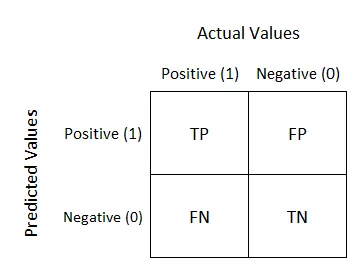

In [ ]:
li = []
for i in y_test:
  li.append(i)

In [ ]:
count = 0
for i in li:
  if i == 0:
    count += 1

print(count,len(li)-count)

16445 5262


In [ ]:
count = 0
for i in predictions:
  if i == 0:
    count += 1

print(count,len(predictions)-count)

19886 1821


In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
for j in range(len(predictions)):
  if predictions[j] == 1:
    if li[j] == 1:
      tp+=1
    else:
      fp+=1
  else:
    if li[j]==0:
      tn += 1
    else:
      fn += 1
print(tp,tn,fp,fn)

966 15590 855 4296


In [ ]:
# Evaluate the model

accuracy = sum(predictions == y_test) / len(y_test)
print('Accuracy:', accuracy)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
fscore = 2 * precision * recall / (precision + recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",fscore)


Accuracy: 0.762703275441102
Precision: 0.5304777594728172
Recall: 0.18358038768529075
F1 score: 0.2727657772130453


## **On applying Laplace Smoothing**

In [ ]:
import numpy as np

class SmoothNaiveBayes:
    def __init__(self):
        self.priors = {}
        self.posteriors = {}
        
    def fit(self, X, y, alpha=1):
        # Compute priors
        classes, counts = np.unique(y, return_counts=True)
        total = len(y)
        self.priors = dict(zip(classes, counts / total))
        
        # Compute posteriors with Laplace smoothing
        for col in X.columns:
            self.posteriors[col] = {}
            unique_vals = X[col].unique()
            for val in unique_vals:
                self.posteriors[col][val] = {}
                for c in classes:
                    subset = X[y == c][col]
                    count_val = len(subset[subset == val])
                    self.posteriors[col][val][c] = (count_val + alpha) / (counts[c] + alpha*len(unique_vals))
        
    def predict(self, X):
        predictions = []
        for i, row in X.iterrows():
            probs = {c: self.priors[c] for c in self.priors}
            for col in X.columns:
                val = row[col]
                for c in self.priors:
                    if val in self.posteriors[col]:
                        probs[c] *= self.posteriors[col][val][c]
                    else:
                        probs[c] = 0
            predictions.append(max(probs, key=probs.get))
        return predictions


In [ ]:
snb = SmoothNaiveBayes()
snb.fit(X_train, y_train)
predictions = snb.predict(X_test)

In [ ]:
li = []
for i in y_test:
  li.append(i)

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
for j in range(len(predictions)):
  if predictions[j] == 1:
    if li[j] == 1:
      tp+=1
    else:
      fp+=1
  else:
    if li[j]==0:
      tn += 1
    else:
      fn += 1
print(tp,tn,fp,fn)

1542 15604 841 3720


In [ ]:
# Evaluate the model

accuracy = sum(predictions == y_test) / len(y_test)
print('Accuracy:', accuracy)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
fscore = 2 * precision * recall / (precision + recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",fscore)

Accuracy: 0.7898834477357535
Precision: 0.6470835081829627
Recall: 0.29304446978335236
F1 score: 0.4034009156311315


## **KNN**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


encoder = LabelEncoder()
df['income_status'] = encoder.fit_transform(df['income_status']) # encode the income column as binary
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 
                                                 'occupation', 'relationship', 'race', 'sex', 
                                                 'native-country']) # one-hot encode categorical features

# Split the dataset into training and testing sets
X = df.drop('income_status', axis=1)
y = df['income_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test the KNN model
y_pred = knn.predict(X_test)

# Evaluate the KNN model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1-Score: {f_score:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8244
Precision: 0.6611
f1-Score: 0.6116
Recall: 0.5689


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the KNN model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1-Score: {f_score:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8498
Precision: 0.7321
f1-Score: 0.6608
Recall: 0.6022
